## CAR PRICE PREDICTION
---- 
 ***This Jupyter notebook contains code for running Supervised Machine Learning Models to perform `regression tasks` on the cleaned Australian Vehicle Price dataset that was saved during the Exploratory Data analysis***

 
***Our goal is to develop and deploy machine learning regression models to `predict the price of a vehicle` based on its features***

The processes to be taken includes: 

>- Label Encoding
>- Feature selection
>- Train Test Split
>- Standardization
>- Model Building, Training and Evaluation
>- Feature importance and Engineering
>- Hyperparameter tuning using K fold
>- Streamlit Deployment




### MODEL SELECTION 
---
The Machine Learning algorithms to perform regression tasks that will be used are: 

- Linear Regressor(lr)
- Decision Tree Regressor(Dt)
- Random Forest Regressor(Rf)
- Lasso Regressor
- XGBRFRegressor 

### IMPORTING NECCESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np

#for visuals
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


#for Label/Data encoding/transformation 
from sklearn.preprocessing import LabelEncoder


#for train test split
from sklearn.model_selection import train_test_split


#for Standardization 
from sklearn.preprocessing import MinMaxScaler



# import the necessary libraries for the model building
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRFRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# algorithms for the evaluation of model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


#For cross validation
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Viewing our cleaned data

Data_1 = pd.read_csv("Cleaned_Australian_Vehicle_Price_Data.csv")

Data_1

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volumes(litres),Fuel_Consumption(litres),Fuel_Consumption_Per_Kilometers
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,5595.0,White / Black,"Caringbah, NSW",4 cyl,SUV,4,7,51990.0,2.2,8.7,100.0
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,16.0,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5,5,19990.0,1.5,6.7,100.0
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,8472.0,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2,4,108988.0,2.5,6.6,100.0
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,136517.0,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2,4,32990.0,5.5,11.0,100.0
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,1035.0,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4,5,34990.0,1.3,6.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,Toyota,2014,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,Front,Unleaded,66000.0,Grey / -,"Rocklea, QLD",4 cyl,Commercial,7,5,29500.0,2.5,7.7,100.0
16372,Mercedes-Benz,2012,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,Rear,Diesel,117432.0,Silver / -,"Port Melbourne, VIC",4 cyl,SUV,4,5,39888.0,2.5,7.7,100.0
16373,Suzuki,2022,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,Front,Unleaded,5165.0,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4,5,35280.0,1.6,6.2,100.0
16374,Mercedes-Benz,2016,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,AWD,Premium,85525.0,Grey / Black,"Albion, QLD",4 cyl,SUV,4,5,41888.0,2.5,7.2,100.0


In [3]:
#Sample of data
Data_1.sample(10)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volumes(litres),Fuel_Consumption(litres),Fuel_Consumption_Per_Kilometers
13141,Ssangyong,2023,Musso,Wayne Phillis SsangYong,2023 Ssangyong Musso Ultimate,NEW,Automatic,4WD,Diesel,6.0,Black / Black,"Christies Beach, SA",4 cyl,Ute / Tray,4,5,46220.0,2.2,8.6,100.0
10777,Jeep,2021,Wrangler,SUV,2021 Jeep Wrangler Sport S (4X4),USED,Automatic,4WD,Unleaded,29345.0,White / Black,"Strathpine, QLD",6 cyl,SUV,2,4,58990.0,3.6,9.6,100.0
12001,Hyundai,2019,I30,Hatchback,2019 Hyundai I30 Active,USED,Automatic,Front,Unleaded,42683.0,Grey / Grey,"Geelong, VIC",4 cyl,Hatchback,4,5,25990.0,2.5,7.4,100.0
9796,Toyota,2021,RAV4,SUV,2021 Toyota RAV4 GX (2WD),USED,Automatic,Front,Unleaded,41873.0,Blue / -,"Hoppers Crossing, VIC",4 cyl,SUV,5,5,40990.0,2.5,6.5,100.0
597,Toyota,2019,Land,Windsor Toyota Used,2019 Toyota Land Cruiser Prado,USED,Automatic,Other,Unleaded,32326.0,White / -,"Windsor, NSW",4 cyl,Wagon,4,5,77990.0,2.5,7.7,100.0
1012,Toyota,2022,Kluger,Lander Toyota Used Cars,2022 Toyota Kluger GXL eFour,USED,Automatic,Other,Premium,5.0,Grey / -,"Blacktown, NSW",4 cyl,Wagon,4,5,79877.0,2.5,7.7,100.0
11301,Subaru,2006,Impreza,Hatchback,2006 Subaru Impreza 2.0I (awd),USED,Automatic,AWD,Unleaded,142000.0,Silver / -,"Archerfield, QLD",4 cyl,Hatchback,5,5,9999.0,2.5,9.3,100.0
12440,Kia,2020,Cerato,Sedan,2020 Kia Cerato GT Safety Pack,USED,Automatic,Front,Unleaded,54344.0,White / -,"Devonport, TAS",4 cyl,Sedan,4,5,29990.0,1.6,6.8,100.0
7907,Mitsubishi,2022,Triton,Ute / Tray,2022 Mitsubishi Triton GLS (4X4),USED,Automatic,4WD,Diesel,8595.0,Blue / Black,"Berwick, VIC",4 cyl,Ute / Tray,4,5,55999.0,2.4,8.6,100.0
1924,Ford,2019,Ranger,Ute / Tray,2019 Ford Ranger Raptor 2.0 (4X4),USED,Automatic,4WD,Diesel,114956.0,Blue / -,"Campbelltown, NSW",4 cyl,Ute / Tray,4,5,61950.0,2.5,8.2,100.0


In [4]:
#Data shape
Data_1.shape

# Remember that we created new columns and we didn't drop the missing values instead we filled them. 

(16376, 20)

In [5]:
#Display data information 
Data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brand                            16376 non-null  object 
 1   Year                             16376 non-null  int64  
 2   Model                            16376 non-null  object 
 3   Car/Suv                          16376 non-null  object 
 4   Title                            16376 non-null  object 
 5   UsedOrNew                        16376 non-null  object 
 6   Transmission                     16376 non-null  object 
 7   DriveType                        16376 non-null  object 
 8   FuelType                         16376 non-null  object 
 9   Kilometres                       16376 non-null  float64
 10  ColourExtInt                     16376 non-null  object 
 11  Location                         16376 non-null  object 
 12  CylindersinEngine 

In [6]:
#To confirm that our data is cleaned 
Data_1.isnull().sum()

Brand                              0
Year                               0
Model                              0
Car/Suv                            0
Title                              0
UsedOrNew                          0
Transmission                       0
DriveType                          0
FuelType                           0
Kilometres                         0
ColourExtInt                       0
Location                           0
CylindersinEngine                  0
BodyType                           0
Doors                              0
Seats                              0
Price                              0
Engine_Volumes(litres)             0
Fuel_Consumption(litres)           0
Fuel_Consumption_Per_Kilometers    0
dtype: int64

In [7]:
Data_1.duplicated().sum()

0

In [8]:
#Descriptive analysis 
Data_1.describe().round()

,Year,Kilometres,Doors,Seats,Price,Engine_Volumes(litres),Fuel_Consumption(litres),Fuel_Consumption_Per_Kilometers
count,16376.0,16376.0,16376.0,16376.0,16376.0,16376.0,16376.0,16376.0
mean,2016.0,95691.0,4.0,5.0,37712.0,2.0,8.0,100.0
std,5.0,69367.0,1.0,1.0,37374.0,1.0,2.0,0.0
min,1940.0,1.0,2.0,2.0,88.0,1.0,0.0,100.0
25%,2014.0,41969.0,4.0,5.0,19888.0,2.0,7.0,100.0
50%,2017.0,87630.0,4.0,5.0,29905.0,2.0,8.0,100.0
75%,2020.0,139256.0,4.0,5.0,44388.0,2.0,8.0,100.0
max,2023.0,295414.0,12.0,22.0,1500000.0,10.0,27.0,100.0


In [9]:
#Check the unique values in each column
def check_unique_values(Data_1):
    unique_values = Data_1.apply(pd.Series.nunique)  # Get unique values for each column
    
    return unique_values

In [10]:
#calling our function
unique_values = check_unique_values(Data_1)
print("Unique values for each column:")
print(unique_values)

Unique values for each column:
Brand                                 75
Year                                  44
Model                                776
Car/Suv                              610
Title                               8635
UsedOrNew                              3
Transmission                           2
DriveType                              5
FuelType                               8
Kilometres                         13951
ColourExtInt                         829
Location                             614
CylindersinEngine                      8
BodyType                              10
Doors                                  9
Seats                                 13
Price                               3767
Engine_Volumes(litres)                57
Fuel_Consumption(litres)             156
Fuel_Consumption_Per_Kilometers        1
dtype: int64


In [11]:
#value count for the categorical columns

for i in Data_1.select_dtypes(include=['object']).columns.tolist():
    print(f'{i}--->{len(Data_1[i].unique())}')

Brand--->75
Model--->776
Car/Suv--->610
Title--->8635
UsedOrNew--->3
Transmission--->2
DriveType--->5
FuelType--->8
ColourExtInt--->829
Location--->614
CylindersinEngine--->8
BodyType--->10


## ***DATA ENCODING***

- We are going to convert our categorical data (object) to numerical data type using label encoder. 

In [12]:
# Get a list of categorical column names
categorical_columns = Data_1.select_dtypes(include=['object']).columns.tolist()

# Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    Data_1[col] = label_encoder.fit_transform(Data_1[col])

In [13]:
#To view the data
Data_1.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volumes(litres),Fuel_Consumption(litres),Fuel_Consumption_Per_Kilometers
0,67,2022,619,505,7691,0,0,1,0,5595.0,666,113,4,6,4,7,51990.0,2.2,8.7,100.0
1,45,2022,491,225,7519,2,0,2,6,16.0,63,80,4,3,5,5,19990.0,1.5,6.7,100.0
2,4,2022,62,159,7296,2,0,4,6,8472.0,423,523,4,2,2,4,108988.0,2.5,6.6,100.0
3,50,2011,273,159,1681,2,0,4,6,136517.0,710,372,7,2,2,4,32990.0,5.5,11.0,100.0
4,61,2022,126,465,7661,2,0,2,7,1035.0,326,119,4,6,4,5,34990.0,1.3,6.0,100.0


In [14]:
#Drop unnecessary column to avoid noise

columns_to_drop = ['Fuel_Consumption_Per_Kilometers', 'Title', 'ColourExtInt', 'Location']
# Replace with the actual column names
Data_1 = Data_1.drop(columns=columns_to_drop, axis=1)

Data_1.head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volumes(litres),Fuel_Consumption(litres)
0,67,2022,619,505,0,0,1,0,5595.0,4,6,4,7,51990.0,2.2,8.7
1,45,2022,491,225,2,0,2,6,16.0,4,3,5,5,19990.0,1.5,6.7
2,4,2022,62,159,2,0,4,6,8472.0,4,2,2,4,108988.0,2.5,6.6
3,50,2011,273,159,2,0,4,6,136517.0,7,2,2,4,32990.0,5.5,11.0
4,61,2022,126,465,2,0,2,7,1035.0,4,6,4,5,34990.0,1.3,6.0


In [15]:
#rename Car/SUV column
Data_1.rename(columns={"Car/Suv" : "CarOrSUV"}, inplace = True)

In [16]:
#Rename the Engine column in litres and fuel consumption in litres
Data_1.rename(columns={"Engine_Volumes(litres)" : "Engine_Volume_Litres"}, inplace = True)
Data_1.rename(columns={"Fuel_Consumption(litres)" : "Fuel_Consumption_Litres"}, inplace = True)

In [17]:
Data_1.head()

,Brand,Year,Model,CarOrSUV,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volume_Litres,Fuel_Consumption_Litres
0,67,2022,619,505,0,0,1,0,5595.0,4,6,4,7,51990.0,2.2,8.7
1,45,2022,491,225,2,0,2,6,16.0,4,3,5,5,19990.0,1.5,6.7
2,4,2022,62,159,2,0,4,6,8472.0,4,2,2,4,108988.0,2.5,6.6
3,50,2011,273,159,2,0,4,6,136517.0,7,2,2,4,32990.0,5.5,11.0
4,61,2022,126,465,2,0,2,7,1035.0,4,6,4,5,34990.0,1.3,6.0


## ***FEATURES SELECTIONS*** 

- The target y which is the vehicle price that we what to predict that is the dependent variable. 
- The independent variables after dropping the target is our X, which is what we are going to train our model that is our features 

In [18]:
#Our features (independent variable)
X = Data_1.drop("Price", axis = 1)

X.head()

,Brand,Year,Model,CarOrSUV,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Engine_Volume_Litres,Fuel_Consumption_Litres
0,67,2022,619,505,0,0,1,0,5595.0,4,6,4,7,2.2,8.7
1,45,2022,491,225,2,0,2,6,16.0,4,3,5,5,1.5,6.7
2,4,2022,62,159,2,0,4,6,8472.0,4,2,2,4,2.5,6.6
3,50,2011,273,159,2,0,4,6,136517.0,7,2,2,4,5.5,11.0
4,61,2022,126,465,2,0,2,7,1035.0,4,6,4,5,1.3,6.0


In [19]:
#Our trget variable which is our y
Y = Data_1['Price']
Y

0         51990.0
1         19990.0
2        108988.0
3         32990.0
4         34990.0
           ...   
16371     29500.0
16372     39888.0
16373     35280.0
16374     41888.0
16375     65888.0
Name: Price, Length: 16376, dtype: float64

In [20]:
correlation = Data_1.corr()

correlation 


,Brand,Year,Model,CarOrSUV,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volume_Litres,Fuel_Consumption_Litres
Brand,1.000000,0.043147,0.055018,0.013248,0.012225,0.039117,-0.105925,0.034737,-0.018652,-0.149181,-0.008405,0.087713,0.028301,-0.028582,-0.044084,-0.073192
Year,0.043147,1.000000,0.103425,-0.058947,-0.386017,-0.206552,-0.136240,-0.100351,-0.672237,-0.169719,0.012959,0.052764,0.033448,0.347626,-0.077205,-0.284133
Model,0.055018,0.103425,1.000000,0.100196,-0.072561,0.006025,-0.221617,-0.149128,-0.026509,-0.004301,0.100940,-0.001061,0.065342,0.030410,-0.009557,0.038768
CarOrSUV,0.013248,-0.058947,0.100196,1.000000,0.267885,0.001644,-0.239620,-0.224114,0.178829,0.155768,0.637122,-0.153928,0.165334,-0.027976,0.229053,0.201646
UsedOrNew,0.012225,-0.386017,-0.072561,0.267885,1.000000,0.063714,0.010066,-0.002164,0.317031,0.068747,-0.015594,0.029126,0.011879,-0.255739,0.034746,0.117327
Transmission,0.039117,-0.206552,0.006025,0.001644,0.063714,1.000000,0.019561,-0.076775,0.198247,0.000561,-0.023410,-0.173922,-0.214226,-0.063741,0.028470,0.037191
DriveType,-0.105925,-0.136240,-0.221617,-0.239620,0.010066,0.019561,1.000000,0.304208,0.006925,0.016743,-0.203947,-0.140504,-0.267700,-0.036408,-0.025418,-0.063869
FuelType,0.034737,-0.100351,-0.149128,-0.224114,-0.002164,-0.076775,0.304208,1.000000,-0.134397,-0.035612,-0.180938,0.138529,-0.020531,-0.159598,-0.142297,0.129611
Kilometres,-0.018652,-0.672237,-0.026509,0.178829,0.317031,0.198247,0.006925,-0.134397,1.000000,0.159470,0.085441,-0.103148,-0.026277,-0.341023,0.132455,0.239661
CylindersinEngine,-0.149181,-0.169719,-0.004301,0.155768,0.068747,0.000561,0.016743,-0.035612,0.159470,1.000000,0.116608,-0.209228,0.045634,0.235060,0.587164,0.484364


<Axes: >

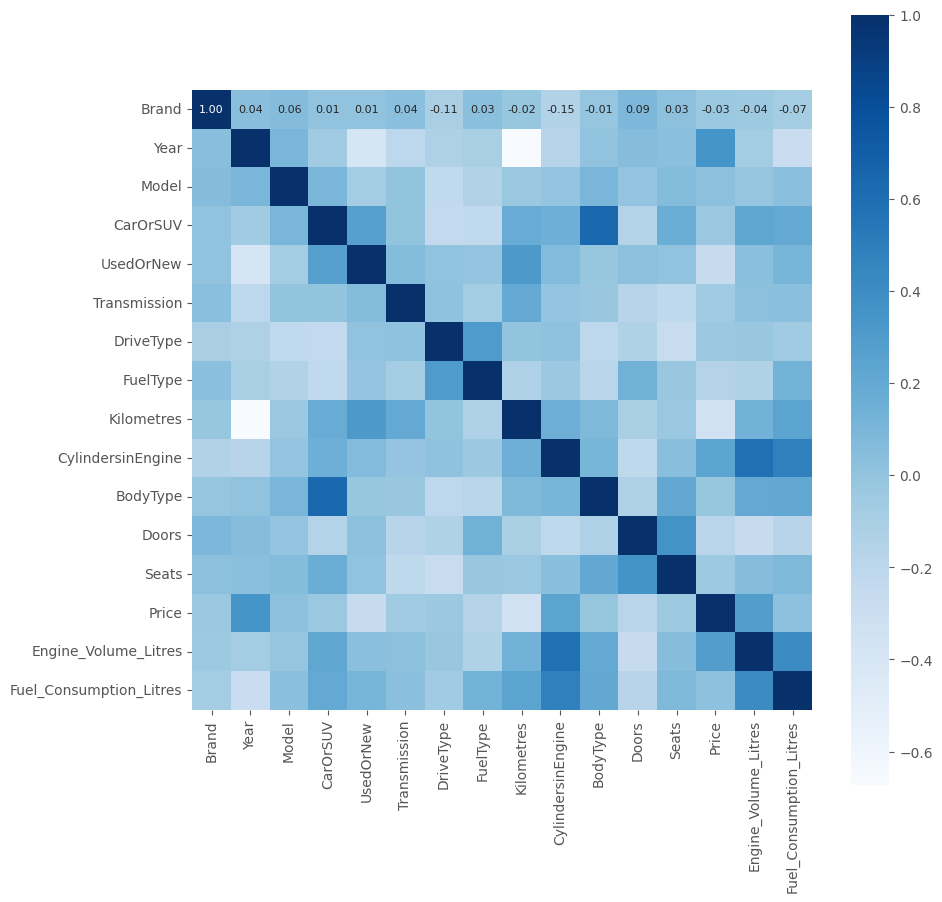

In [21]:
#Visulaization to show corelation 

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt = ".2f", annot = True, annot_kws = {"size":8}, cmap="Blues")

## ***TRAIN TEST SPLIT*** 

- We are going to split the dataset into training and testing set using the train_test_split function 
- We will get the test size 20% and training set to 80% and random state to 42

In [22]:
# split the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [23]:
#Viewing the test and train set
print(X_test.head(3))
print(Y_test.head(3))
print(X_train.head(3))
print(Y_train.head(3))

       Brand  Year  Model  CarOrSUV  UsedOrNew  Transmission  DriveType  \
1655      53  2008    567       465          2             0          0   
15382     13  1997    519       182          2             0          3   
4215      48  2006     29       471          2             0          2   

       FuelType  Kilometres  CylindersinEngine  BodyType  Doors  Seats  \
1655          7    247880.0                  6         6      4      7   
15382         7     23745.0                  4         8      4      5   
4215          7    153798.0                  4         7      4      5   

       Engine_Volume_Litres  Fuel_Consumption_Litres  
1655                    2.5                     13.5  
15382                   2.5                      7.7  
4215                    2.3                      9.3  
1655     10950.0
15382    22888.0
4215      9990.0
Name: Price, dtype: float64
       Brand  Year  Model  CarOrSUV  UsedOrNew  Transmission  DriveType  \
5157      73  2020    245   

In [24]:
# check the shape of the splitted data
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The Y_train shape: {Y_train.shape}')
print(f'The Y_test shape: {Y_test.shape}')

The X_train shape: (13100, 15)
The X_test shape: (3276, 15)
The Y_train shape: (13100,)
The Y_test shape: (3276,)


### ***STANDARDIZATION***

- We will scale the features of the data using MinMax Scaler.
-  The goal is to standardize or normalize the range of independent variables or features of the dataset
- The essence of scaling is to ensure that the features in the dataset are on a similar scale, which can lead to improved model performance and more reliable results in machine learning tasks.

In [25]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_test_scaled = scaler.transform(X_test)

In [26]:
#Sample of scaled independent variable
X_test_scaled

array([[0.71621622, 0.81927711, 0.7316129 , ..., 0.25      , 0.17977528,
        0.65217391],
       [0.17567568, 0.68674699, 0.66967742, ..., 0.15      , 0.17977528,
        0.37198068],
       [0.64864865, 0.79518072, 0.03741935, ..., 0.15      , 0.15730337,
        0.44927536],
       ...,
       [0.97297297, 0.95180723, 0.60516129, ..., 0.25      , 0.40449438,
        0.4589372 ],
       [0.39189189, 0.95180723, 0.24258065, ..., 0.15      , 0.17977528,
        0.37198068],
       [0.64864865, 1.        , 0.25419355, ..., 0.15      , 0.17977528,
        0.37198068]])

In [27]:
X_train_scaled

array([[0.98648649, 0.96385542, 0.31612903, ..., 0.15      , 0.17977528,
        0.37198068],
       [0.25675676, 0.91566265, 0.79225806, ..., 0.15      , 0.25842697,
        0.43478261],
       [0.25675676, 0.91566265, 0.89935484, ..., 0.15      , 0.20224719,
        0.39613527],
       ...,
       [0.98648649, 0.87951807, 0.90064516, ..., 0.15      , 0.17977528,
        0.42512077],
       [0.51351351, 0.96385542, 0.50709677, ..., 0.15      , 0.30337079,
        0.5410628 ],
       [0.41891892, 0.96385542, 0.58580645, ..., 0.15      , 0.17977528,
        0.34782609]])

## ***MODELING(BUILDING AND EVALUATION)***

I am going to make use of five machine learning algorithms (models) to perform the regression task, and then eventually, the model that performs the best will be picked. 

- Linear Regressor(lr)
- Decision Tree Regressor(Dt)
- Random Forest Regressor(Rf)
- Lasso Regression
- XGBRFRegressor 

### ***LINEAR REGRESSION***

In [28]:
lr_model = LinearRegression()

# fit the the model
lr_model.fit(X_train_scaled, Y_train)

LinearRegression()

In [29]:
# create predictions
lr_y_pred = lr_model.predict(X_test_scaled)

lr_y_pred

array([10505.60602879, 18580.20023854,  7184.70762096, ...,
       94676.59924449, 33433.10846606, 62883.80091438])

In [30]:
# Compare the Actual vehicle prices with the predicted prices to see the difference. 
print('Actual prices: ', Y.head().tolist())

print('Predicted prices: ', np.round(lr_y_pred[:5].tolist(), 1))

Actual prices:  [51990.0, 19990.0, 108988.0, 32990.0, 34990.0]
Predicted prices:  [10505.6 18580.2  7184.7 21423.3 28414.8]


### ***LINEAR REGRESSION MODEL EVALUATION***

- We will evaluate the performance of the model by calculating the MSE(mean squared error), RMSE(Root mean square error), MAE(mean absolute error) and r2 score(coefficient of determination)

>- The lower the MAE, MSE, RMSE, the better the model's performance.
>- The closer the r2_score (coefficient of determination) to 1, the better the model's performance.
>- The R2 score ranges from 0 to 1, with 1 indicating a perfect fit where the independent variables explain all the variability of the dependent variable, and 0 indicating that the independent variables do not explain any of the variability.

In [31]:
# Linear Regression model Evaluation
linear_mse = mean_squared_error(Y_test, lr_y_pred)
linear_r2 = r2_score(Y_test, lr_y_pred)
linear_mae = mean_absolute_error(Y_test, lr_y_pred)
linear_rmse = mean_squared_error(Y_test, lr_y_pred, squared = False)

print('R2 of Linear Regression:', linear_r2.round(2))
print('MAE of Linear Regression:', linear_mae.round(2))
print('MSE of Linear Regression:', linear_mse.round(2))
print('RMSE of Linear Regression:', linear_rmse.round(2))

R2 of Linear Regression: 0.38
MAE of Linear Regression: 13549.35
MSE of Linear Regression: 674683284.63
RMSE of Linear Regression: 25974.67


***INTERPRETATION OF RESULT***

>- R2 (R-squared) of Linear Regression: 0.38 - This indicates that approximately 38% of the variance in the dependent variable is explained by the independent variables in the linear regression model.

>- MAE (Mean Absolute Error) of Linear Regression: 13549.35 - This represents the average absolute difference between the predicted values and the actual values.

>- MSE (Mean Squared Error) of Linear Regression: 674683284.63 - This measures the average of the squares of the errors or deviations, which provides a relative measure of the quality of the regression model.

>- RMSE (Root Mean Squared Error) of Linear Regression: 25974.67  - This is the square root of the MSE and provides an interpretable measure of the average magnitude of the errors in the model's predictions.

*In conclusion, an R2 value of 0.38 indicates that the Linear Regression model is not a good fit for the data and only explains a small portion of the variance in the target variable. The high values for MAE, MSE, and RMSE suggest that the model's predictions are far from the actual values of the target variable*

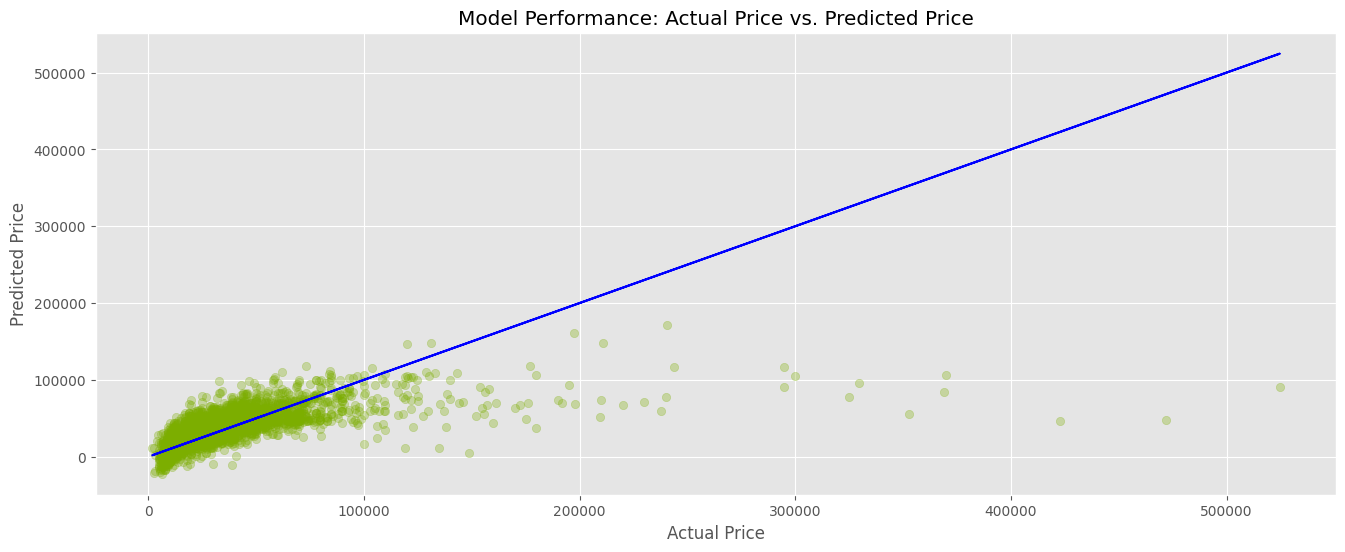

In [32]:
#Visualization to show the model fitting
plt.figure(figsize=(16, 6))
plt.scatter(Y_test, lr_y_pred, c='#7CAE00', alpha=0.3)

# Adding a line for perfect correlation
plt.plot(Y_test, Y_test, color='b')

# Adding labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Model Performance: Actual Price vs. Predicted Price")

plt.show()

***Explanation of Graph***

- `Green dots `scattered on the graph represent individual observations, with their positions based on actual and predicted prices.
- `Blue line` diagonally across the graph indicates perfect prediction, with dots closer to the line suggesting accurate predictions.

***When the dots move closer to the line on the scatter plot graph, it indicates that the predicted values are closer to the actual values. In the context of a predictive model, this proximity suggests that the model is making more accurate predictions. The closer the dots are to the line, the lower the discrepancy between the predicted values and the actual values***

***From the plot, we can see that the points are far to the line meaning that our model isn't performing well***

### ***DECISION TREE REGRESSION***

In [33]:
Dt_model = DecisionTreeRegressor()

# fit the the model
Dt_model.fit(X_train_scaled, Y_train)

DecisionTreeRegressor()

In [34]:
# create predictions
Dt_y_pred = Dt_model.predict(X_test_scaled)

Dt_y_pred

array([15999.,  8980.,  7990., ..., 99990., 37888., 47926.])

In [35]:
# Compare the Actual vehicle prices with the predicted prices to see the difference. 
print('Actual prices: ', Y.head().tolist())

print('Predicted prices: ', np.round(Dt_y_pred[:5].tolist(), 1))

Actual prices:  [51990.0, 19990.0, 108988.0, 32990.0, 34990.0]
Predicted prices:  [15999.  8980.  7990. 35990. 15662.]


### ***DECISION TREE REGRESSION MODEL EVALUATION***

- We will evaluate the performance of the model by calculating the MSE(mean squared error), RMSE(Root mean square error), MAE(mean absolute error) and r2 score(coefficient of determination)

>- The lower the MAE, MSE, RMSE, the better the model's performance.
>- The closer the r2_score (coefficient of determination) to 1, the better the model's performance.
>- The R2 score ranges from 0 to 1, with 1 indicating a perfect fit where the independent variables explain all the variability of the dependent variable, and 0 indicating that the independent variables do not explain any of the variability.

In [36]:
# Decision Tree Regression model Evaluation
Dt_mse = mean_squared_error(Y_test, Dt_y_pred)
Dt_r2 = r2_score(Y_test, Dt_y_pred)
Dt_mae = mean_absolute_error(Y_test, Dt_y_pred)
Dt_rmse = mean_squared_error(Y_test, Dt_y_pred, squared = False)

print('R2 of Decision Tree Regression:', Dt_r2.round(2))
print('MAE of Decision Tree Regression:', Dt_mae.round(2))
print('MSE of Decision Tree Regression:', Dt_mse.round(2))
print('RMSE of Decision Tree Regression:', Dt_rmse.round(2))

R2 of Decision Tree Regression: 0.64
MAE of Decision Tree Regression: 7807.66
MSE of Decision Tree Regression: 391896943.75
RMSE of Decision Tree Regression: 19796.39


***INTERPRETATION OF RESULT***

>- R2 (R-squared) of Decision Tree Regression: 0.64. This indicates that approximately 64% of the variance in the dependent variable is explained by the independent variables in the Decision Tree regression model.

>- MAE (Mean Absolute Error) of Decision Tree Regression: 7807.66. This represents the average absolute difference between the predicted values and the actual values.

>- MSE (Mean Squared Error) of Decision Tree Regression: 391896943.75 This measures the average of the squares of the errors or deviations, which provides a relative measure of the quality of the regression model.

>- RMSE (Root Mean Squared Error) of Decision Tree Regression: 19796.39. This is the square root of the MSE and provides an interpretable measure of the average magnitude of the errors in the model's predictions.

*In conclusion, an R2 value of 0.64 indicates that the Decision Tree Regression model explains approximately 64% of the variance in the target variable. While an R2 of 0.64 is not a perfect fit, it does suggest that the model explains a moderate portion of the variance. Also, the high values for MAE, MSE, and RMSE suggest that the model's predictions have relatively large errors when compared to the actual values of the target variable but it is lower than that of the linear regression model meaning there is room for improvement.*

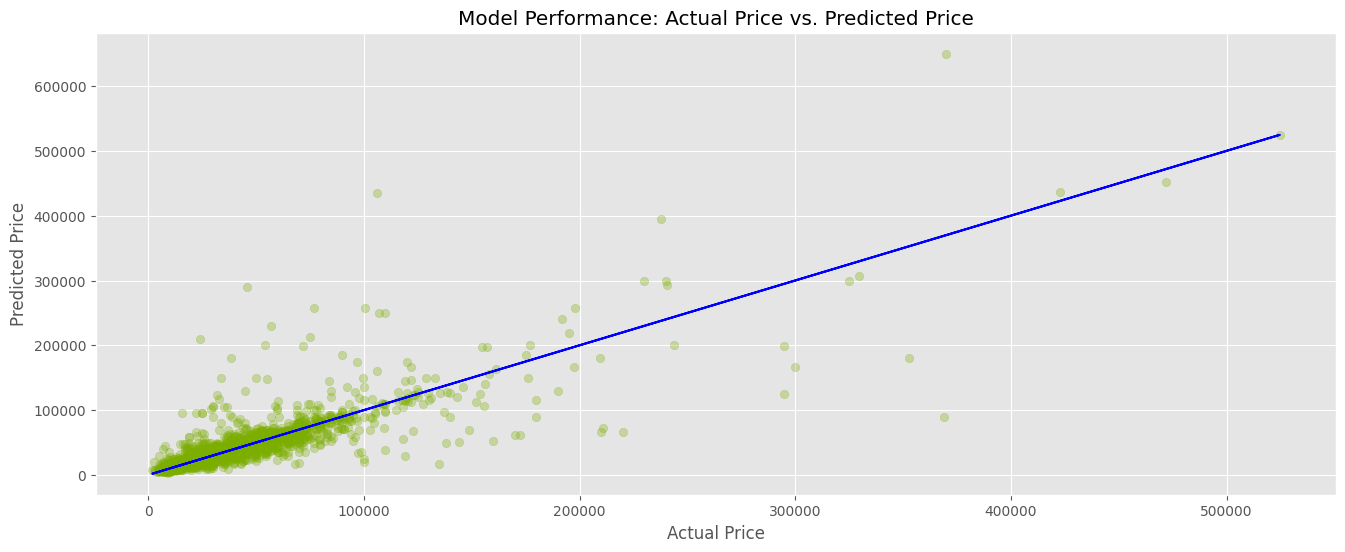

In [37]:
#Visualization to show the model fitting
plt.figure(figsize=(16, 6))
plt.scatter(Y_test, Dt_y_pred, c='#7CAE00', alpha=0.3)

# Adding a line for perfect correlation
plt.plot(Y_test, Y_test, color='b')

# Adding labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Model Performance: Actual Price vs. Predicted Price")

plt.show()

***Explanation of Graph***

- `Green dots `scattered on the graph represent individual observations, with their positions based on actual and predicted prices.
- `Blue line` diagonally across the graph indicates perfect prediction, with dots closer to the line suggesting accurate predictions.

***When the dots move closer to the line on the scatter plot graph, it indicates that the predicted values are closer to the actual values. In the context of a predictive model, this proximity suggests that the model is making more accurate predictions. The closer the dots are to the line, the lower the discrepancy between the predicted values and the actual values***

***From the plot, we can see that the points are not too far to the line meaning that our model isn't a perfect fit but it is moderate***

### ***RANDOM FOREST REGRESSION***

In [38]:
Rf_model = RandomForestRegressor(random_state = 42)

# fit the model
Rf_model.fit(X_train_scaled, Y_train)

RandomForestRegressor(random_state=42)

In [39]:
# create predictions
Rf_y_pred = Rf_model.predict(X_test_scaled)

Rf_y_pred

array([ 14317.81      ,  30414.88      ,   8749.55      , ...,
       106789.2       ,  41085.1       ,  50519.74666667])

In [40]:
# Compare the Actual vehicle prices with the predicted prices to see the difference. 
print('Actual prices: ', Y.head().tolist())

print('Predicted prices: ', np.round(Rf_y_pred[:5].tolist(), 1))

Actual prices:  [51990.0, 19990.0, 108988.0, 32990.0, 34990.0]
Predicted prices:  [14317.8 30414.9  8749.6 37711.7 17320.3]


### ***RANDOM FOREST REGRESSION MODEL EVALUATION***

- We will evaluate the performance of the model by calculating the MSE(mean squared error), RMSE(Root mean square error), MAE(mean absolute error) and r2 score(coefficient of determination)

>- The lower the MAE, MSE, RMSE, the better the model's performance.
>- The closer the r2_score (coefficient of determination) to 1, the better the model's performance.
>- The R2 score ranges from 0 to 1, with 1 indicating a perfect fit where the independent variables explain all the variability of the dependent variable, and 0 indicating that the independent variables do not explain any of the variability.

In [41]:
# Random Forest Regression model Evaluation
Rf_mse = mean_squared_error(Y_test, Rf_y_pred)
Rf_r2 = r2_score(Y_test, Rf_y_pred)
Rf_mae = mean_absolute_error(Y_test, Rf_y_pred)
Rf_rmse = mean_squared_error(Y_test, Rf_y_pred, squared = False)

print('R2 of Random Forest Regression:', Rf_r2.round(2))
print('MAE of Random Forest Regression:', Rf_mae.round(2))
print('MSE of Random Forest Regression:', Rf_mse.round(2))
print('RMSE of Random Forest Regression:', Rf_rmse.round(2))

R2 of Random Forest Regression: 0.86
MAE of Random Forest Regression: 5678.11
MSE of Random Forest Regression: 158022338.41
RMSE of Random Forest Regression: 12570.69


 ***INTERPRETATION OF RESULT***

>- R2 (R-squared) of Random Forest Regression: 0.86. This indicates that approximately 86% of the variance in the dependent variable is explained by the independent variables in the Random Forest regression model.

>- MAE (Mean Absolute Error) of Random Forest Regression: 5678.11. This represents the average absolute difference between the predicted values and the actual values.

>- MSE (Mean Squared Error) of Random Forest Regression: 158022338.41. This measures the average of the squares of the errors or deviations, which provides a relative measure of the quality of the regression model.

>- RMSE (Root Mean Squared Error) of Random Forest Regression: 12570.69. This is the square root of the MSE and provides an interpretable measure of the average magnitude of the errors in the model's predictions.

*In conclusion, the Random Forest Regression model demonstrates strong performance with an R2 value of 0.86, indicating that approximately 86% of the variance in the target variable is explained by the model. The model is a better fit to the data. The relatively low values for MAE, MSE, and RMSE suggest that the model's predictions have smaller errors compared to the actual values of the target variable. Overall, the Random Forest Regression model shows good performance meaning that the model predicts is closer to the actual values. The model performance is better than Linear Regression and Decision Tree model performance Overall, the model shows promising performance and it is a reliable choice for predicting the target variable.* 

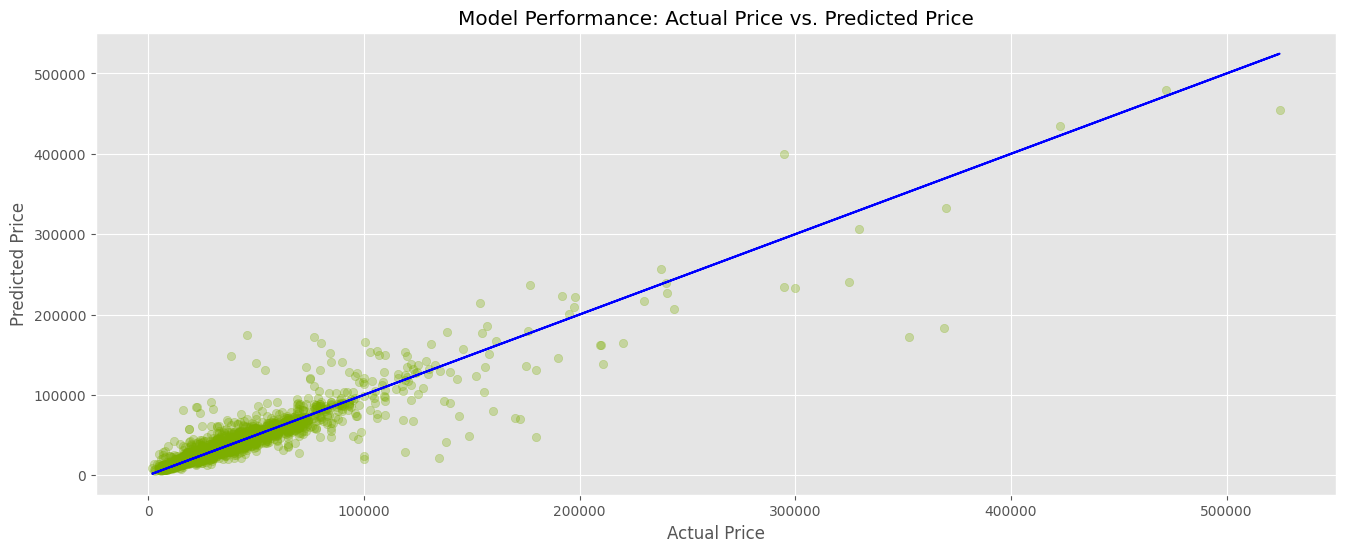

In [42]:
#Visualization to show the model fitting
plt.figure(figsize=(16, 6))
plt.scatter(Y_test, Rf_y_pred, c='#7CAE00', alpha=0.3)

# Adding a line for perfect correlation
plt.plot(Y_test, Y_test, color='b')

# Adding labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Model Performance: Actual Price vs. Predicted Price")

plt.show()

***Explanation of Graph***

- `Green dots `scattered on the graph represent individual observations, with their positions based on actual and predicted prices.
- `Blue line` diagonally across the graph indicates perfect prediction, with dots closer to the line suggesting accurate predictions.

***When the dots move closer to the line on the scatter plot graph, it indicates that the predicted values are closer to the actual values. In the context of a predictive model, this proximity suggests that the model is making more accurate predictions. The closer the dots are to the line, the lower the discrepancy between the predicted values and the actual values***

***From the plot, we can see that the points are closer to the line meaning that our model is performing well and it is giving accurate predictions***

### ***LASSO REGRESSION***

In [43]:
Lasso_model = Lasso()

# fit the model
Lasso_model.fit(X_train_scaled, Y_train)

Lasso()

In [44]:
# create predictions
Lasso_y_pred = Lasso_model.predict(X_test_scaled)

Lasso_y_pred

array([10538.32762075, 18699.19364061,  7220.99782588, ...,
       94650.16657736, 33423.23738876, 62858.95955494])

In [45]:
# Compare the Actual vehicle prices with the predicted prices to see the difference. 
print('Actual prices: ', Y.head().tolist())

print('Predicted prices: ', np.round(Lasso_y_pred[:5].tolist(), 1))

Actual prices:  [51990.0, 19990.0, 108988.0, 32990.0, 34990.0]
Predicted prices:  [10538.3 18699.2  7221.  21446.5 28454.7]


### ***LASSO REGRESSION MODEL EVALUATION***

- We will evaluate the performance of the model by calculating the MSE(mean squared error), RMSE(Root mean square error), MAE(mean absolute error) and r2 score(coefficient of determination)

>- The lower the MAE, MSE, RMSE, the better the model's performance.
>- The closer the r2_score (coefficient of determination) to 1, the better the model's performance.
>- The R2 score ranges from 0 to 1, with 1 indicating a perfect fit where the independent variables explain all the variability of the dependent variable, and 0 indicating that the independent variables do not explain any of the variability.

In [46]:
# Random Forest Regression model Evaluation
Lasso_mse = mean_squared_error(Y_test, Lasso_y_pred)
Lasso_r2 = r2_score(Y_test, Lasso_y_pred)
Lasso_mae = mean_absolute_error(Y_test, Lasso_y_pred)
Lasso_rmse = mean_squared_error(Y_test, Lasso_y_pred, squared = False)

print('R2 of Lasso:', Lasso_r2.round(2))
print('MAE of Lasso:', Lasso_mae.round(2))
print('MSE of Lasso:', Lasso_mse.round(2))
print('RMSE of Lasso:', Lasso_rmse.round(2))

R2 of Lasso: 0.38
MAE of Lasso: 13546.1
MSE of Lasso: 674716589.11
RMSE of Lasso: 25975.31


***INTERPRETATION OF RESULT***

>- R2 (R-squared) of Lasso Regression: 0.38 - This indicates that approximately 38% of the variance in the dependent variable is explained by the independent variables in the Lasso regression model.

>- MAE (Mean Absolute Error) of Lasso Regression: 13546.1 - This represents the average absolute difference between the predicted values and the actual values.

>- MSE (Mean Squared Error) of Lasso Regression: 674716589.11  - This measures the average of the squares of the errors or deviations, which provides a relative measure of the quality of the regression model.

>- RMSE (Root Mean Squared Error) of Lasso Regression: 25975.31- This is the square root of the MSE and provides an interpretable measure of the average magnitude of the errors in the model's predictions.

*In conclusion, an R2 value of 0.38 indicates that the Lasso Regression model is not a good fit for the data and only explains a small portion of the variance in the target variable. The high values for MAE, MSE, and RMSE suggest that the model's predictions are far from the actual values of the target variable. It's result is almost the same as Linear Regression*

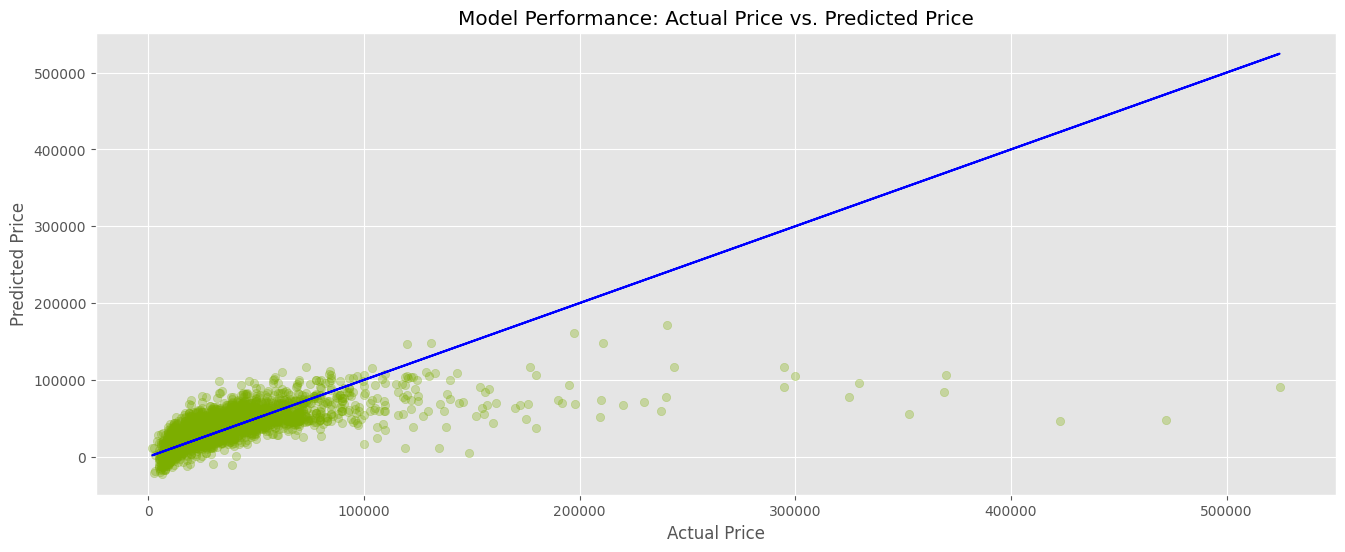

In [47]:
#Visualization to show the model fitting
plt.figure(figsize=(16, 6))
plt.scatter(Y_test, Lasso_y_pred, c='#7CAE00', alpha=0.3)

# Adding a line for perfect correlation
plt.plot(Y_test, Y_test, color='b')

# Adding labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Model Performance: Actual Price vs. Predicted Price")

plt.show()

***Explanation of Graph***

- `Green dots `scattered on the graph represent individual observations, with their positions based on actual and predicted prices.
- `Blue line` diagonally across the graph indicates perfect prediction, with dots closer to the line suggesting accurate predictions.

***When the dots move closer to the line on the scatter plot graph, it indicates that the predicted values are closer to the actual values. In the context of a predictive model, this proximity suggests that the model is making more accurate predictions. The closer the dots are to the line, the lower the discrepancy between the predicted values and the actual values***

***From the plot, we can see that the points are far to the line meaning that our model isn't performing well***

### ***XGBRF REGRESSION***

- It stands for "Extreme Gradient Boosting Random Forest Regression. It represents a regression model that combines the strengths of Extreme Gradient Boosting (XGBoost) and Random Forest techniques for accurate and efficient regression predictions in machine learning applications.

In [48]:
XGBRF_model =  XGBRFRegressor()

# fit the model
XGBRF_model.fit(X_train_scaled, Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [49]:
# create predictions
XGBRF_y_pred = XGBRF_model.predict(X_test_scaled)

XGBRF_y_pred

array([15753.282, 22140.006, 15638.672, ..., 95111.23 , 34680.582,
       52606.355], dtype=float32)

In [50]:
# Compare the Actual vehicle prices with the predicted prices to see the difference. 
print('Actual prices: ', Y.head().tolist())

print('Predicted prices: ', np.round(XGBRF_y_pred[:5].tolist(), 1))

Actual prices:  [51990.0, 19990.0, 108988.0, 32990.0, 34990.0]
Predicted prices:  [15753.3 22140.  15638.7 39879.5 30990.5]


### ***XGBRF REGRESSION MODEL EVALUATION***

- We will evaluate the performance of the model by calculating the MSE(mean squared error), RMSE(Root mean square error), MAE(mean absolute error) and r2 score(coefficient of determination)

>- The lower the MAE, MSE, RMSE, the better the model's performance.
>- The closer the r2_score (coefficient of determination) to 1, the better the model's performance.
>- The R2 score ranges from 0 to 1, with 1 indicating a perfect fit where the independent variables explain all the variability of the dependent variable, and 0 indicating that the independent variables do not explain any of the variability.

In [51]:
# Random Forest Regression model Evaluation
XGBRF_mse = mean_squared_error(Y_test, XGBRF_y_pred)
XGBRF_r2 = r2_score(Y_test, XGBRF_y_pred)
XGBRF_mae = mean_absolute_error(Y_test, XGBRF_y_pred)
XGBRF_rmse = mean_squared_error(Y_test, XGBRF_y_pred, squared = False)

print('R2 of XGBRF:', XGBRF_r2.round(2))
print('MAE of XGBRF:', XGBRF_mae.round(2))
print('MSE of XGBRF:', XGBRF_mse.round(2))
print('RMSE of XGBRF:', XGBRF_rmse.round(2))

R2 of XGBRF: 0.71
MAE of XGBRF: 9841.16
MSE of XGBRF: 314380589.42
RMSE of XGBRF: 17730.78


***INTERPRETATION OF RESULT***

>- R2 (R-squared) of XGBRF Regression: 0.71 - The XGBRF model explains approximately 71% of the variance in the target variable, indicating the goodness of fit of the model.

>- MAE (Mean Absolute Error) of XGBRF Regression: The average absolute difference between the predicted values and the actual values by the XGBRF model is 9841.16.

>- MSE (Mean Squared Error) of XGBRF Regression: The average of the squared differences between the predicted values and the actual values by the XGBRF model is 314380589.42.

>- RMSE (Root Mean Squared Error) of XGBRF Regression: The square root of the MSE, which is 17730.78, provides an interpretable measure of the average magnitude of the errors in the model's predictions.



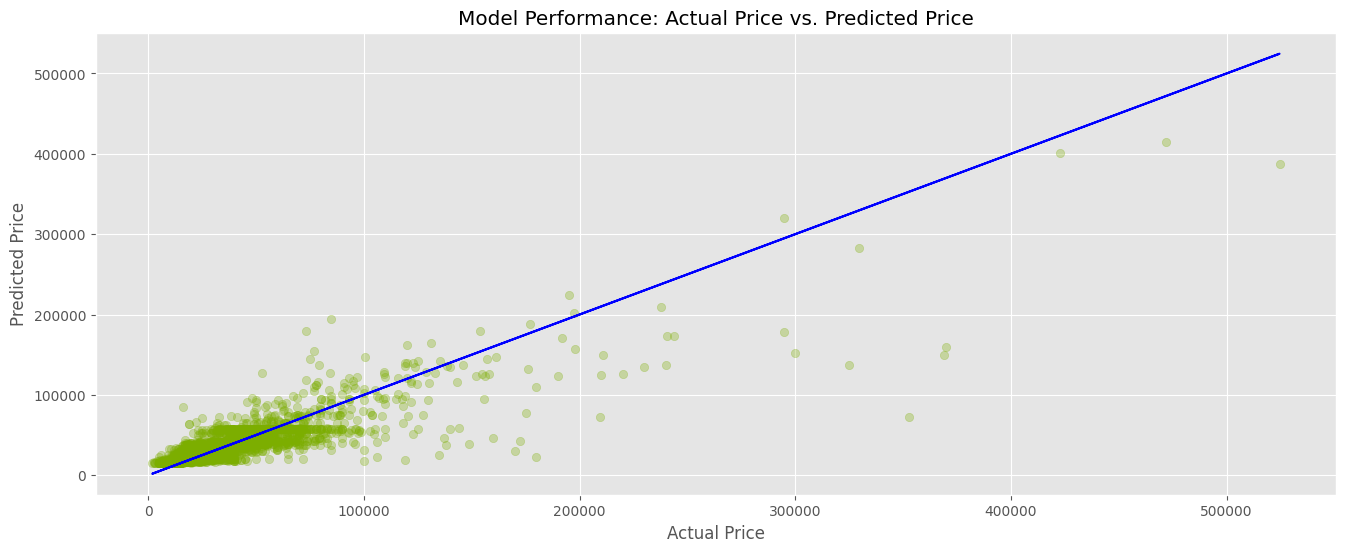

In [52]:
#Visualization to show the model fitting
plt.figure(figsize=(16, 6))
plt.scatter(Y_test, XGBRF_y_pred, c='#7CAE00', alpha=0.3)

# Adding a line for perfect correlation
plt.plot(Y_test, Y_test, color='b')

# Adding labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Model Performance: Actual Price vs. Predicted Price")

plt.show()

***FINAL CONCLUSION***

- Based on the five(5) regression models used; Random Forest Regressor tends to perform better with an R2 score of 0.86 and lesser MSE, MAE, AND RMSE compared to other regression models used to make predictions. This means that Random Forest Regressor model is a good fit on the data. 

## ***Feature Importance and Engineering***

*After training the best performing model which is Random Forest, we will analyze feature importance. We want to see which features of the independent variables contribute to the performance of the Random Forest model, and use it to retrain and vaidate our model.*

In [53]:
# Feature importances using Random Forest
feature_importances = Rf_model.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key = lambda x: x[1], reverse = True)

for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance}')
    
#This code iterates through the feature importances obtained from the Random Forest model.
# It displays them alongside their respective feature names in descending order of importance.

Year: 0.27600158207067493
CylindersinEngine: 0.22835112898932927
Kilometres: 0.09051382716036052
Fuel_Consumption_Litres: 0.07186325931615595
Engine_Volume_Litres: 0.06210706400406126
Brand: 0.05613670648090881
Model: 0.05428239472077189
BodyType: 0.0494670872144302
FuelType: 0.03613477389903201
DriveType: 0.0345406373831446
CarOrSUV: 0.022041463368364517
Seats: 0.00837500516281005
Doors: 0.004703812794362688
UsedOrNew: 0.0032001893472601395
Transmission: 0.002281068088333031


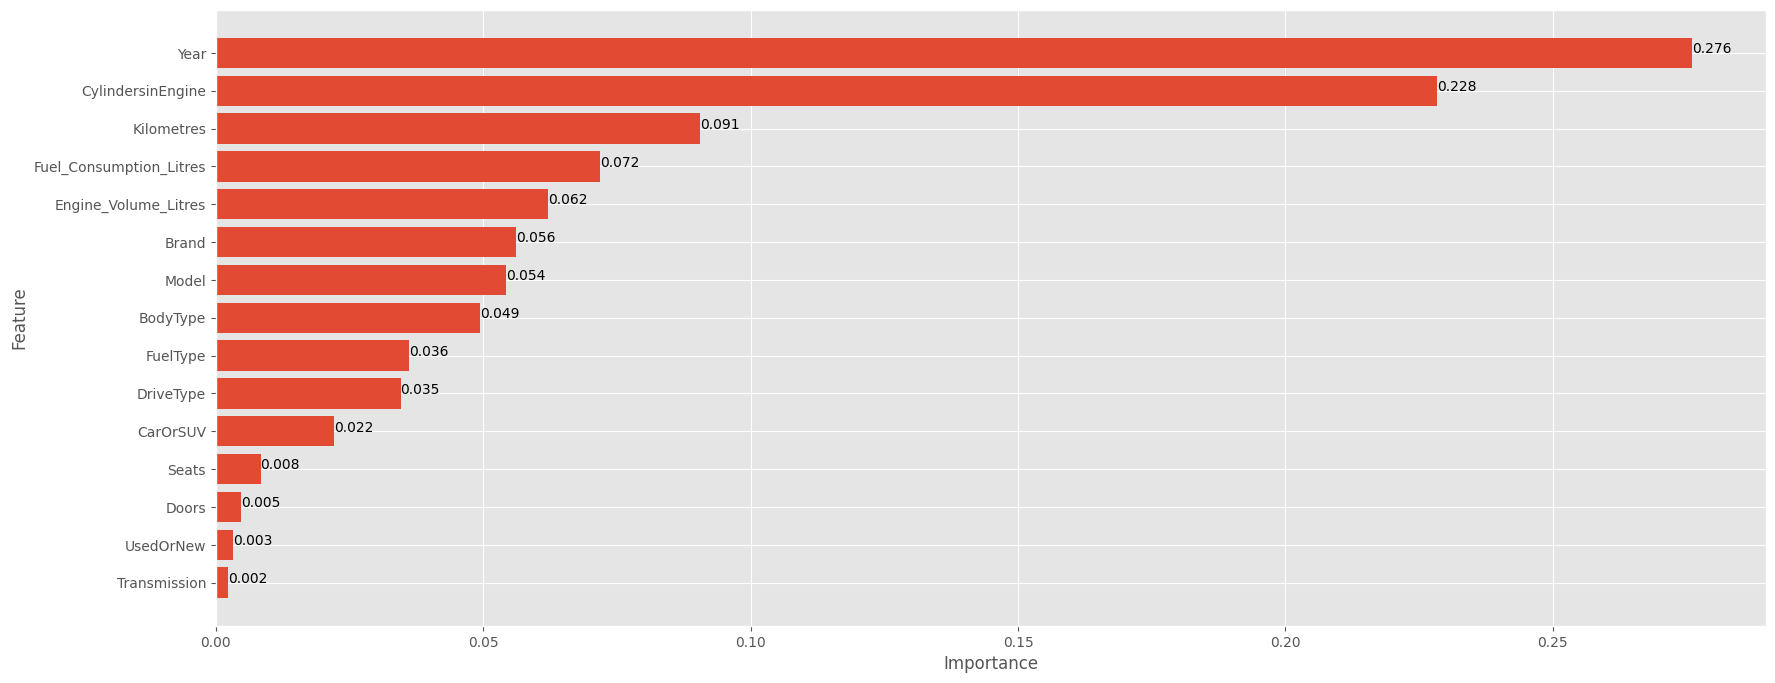

In [54]:
#Plot the feature importance using Random Forest
feature_importances = Rf_model.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key = lambda x: x[1], reverse = False)

# Create a horizontal bar chart to display feature importances
plt.figure(figsize = (20, 8))
plt.barh(range(len(sorted_feature_importance)), [val[1] for val in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [val[0] for val in sorted_feature_importance])
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add data labels to the chart
for i, v in enumerate([val[1] for val in sorted_feature_importance]):
    plt.text(v, i, str(round(v, 3)))

plt.show()


****From the output geenrated, we can see that Year, CylindersinEngine, Fuel_Consumption(litres), Kilometres, Brand, Model, Body Type, Engine_Volumne, FuelType, Drive Type features seems to contribute more to the Random Forest model. So therefore, we will re train our model using these features and look out for any noticeable changes*** 

In [55]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Perform feature selection using SelectKBest with f_regression score function
selector = SelectKBest(score_func=f_regression, k=8) 
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

In [56]:
X_train_selected

array([[2.020e+03, 2.000e+00, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        2.500e+00],
       [2.016e+03, 2.000e+00, 0.000e+00, ..., 5.000e+00, 4.000e+00,
        3.200e+00],
       [2.016e+03, 2.000e+00, 0.000e+00, ..., 6.000e+00, 4.000e+00,
        2.700e+00],
       ...,
       [2.013e+03, 2.000e+00, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        2.500e+00],
       [2.020e+03, 2.000e+00, 0.000e+00, ..., 6.000e+00, 4.000e+00,
        3.600e+00],
       [2.020e+03, 2.000e+00, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        2.500e+00]])

In [57]:
X_test_selected

array([[2.008e+03, 2.000e+00, 0.000e+00, ..., 6.000e+00, 4.000e+00,
        2.500e+00],
       [1.997e+03, 2.000e+00, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        2.500e+00],
       [2.006e+03, 2.000e+00, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        2.300e+00],
       ...,
       [2.019e+03, 2.000e+00, 0.000e+00, ..., 7.000e+00, 4.000e+00,
        4.500e+00],
       [2.019e+03, 2.000e+00, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        2.500e+00],
       [2.023e+03, 1.000e+00, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        2.500e+00]])

In [58]:
# Train our best performing model which is Random Forest regression model on the selected features
rf_model = RandomForestRegressor()
rf_model.fit(X_train_selected, Y_train)

RandomForestRegressor()

In [59]:
# create predictions
y_pred = rf_model.predict(X_test_selected)

y_pred

array([ 7524.27      , 25683.49      ,  8607.71      , ...,
       97600.76      , 23701.35      , 48684.56904762])

In [60]:
# manually compare the lagos house price
print('Actual prices: ', Y.head().tolist())
print('..........................................')
print('Predicted prices: ', np.round(y_pred[:5].tolist(), 2))

Actual prices:  [51990.0, 19990.0, 108988.0, 32990.0, 34990.0]
..........................................
Predicted prices:  [ 7524.27 25683.49  8607.71 38692.77 24039.  ]


In [61]:
# Random Forest Regression model Evaluation
Rf_mse = mean_squared_error(Y_test, y_pred)
Rf_r2 = r2_score(Y_test, y_pred)
Rf_mae = mean_absolute_error(Y_test, y_pred)
Rf_rmse = mean_squared_error(Y_test, y_pred, squared = False)

print('R2 of Random Forest Regression:', Rf_r2.round(2))
print('MAE of Random Forest Regression:', Rf_mae.round(2))
print('MSE of Random Forest Regression:', Rf_mse.round(2))
print('RMSE of Random Forest Regression:', Rf_rmse.round(2))

R2 of Random Forest Regression: 0.7
MAE of Random Forest Regression: 9115.96
MSE of Random Forest Regression: 328684117.9
RMSE of Random Forest Regression: 18129.65


***Using the top 8 features that contributed to the Random Forest model, we got a lesser r2 score compared to when we made use of all our independent features which means that making use of all the features gives a better result on the Random Forest model***

## ***USING K FOLD CROSS VALIDATION***

-` Cross-validation` on a regression model is used to assess the model's performance and generalization ability by splitting the dataset into multiple subsets for training and testing. In the context of a regression model, cross-validation helps to estimate how well the model will perform on independent data and provides insights into its predictive accuracy.

In [62]:
#Scaling the independent variable
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_scaled = scaler.fit_transform(X)

In [63]:
#o LR MODEL
cross_val_score(LinearRegression(), X_scaled, Y)

array([0.35642873, 0.31630745, 0.41562276, 0.32833694, 0.18910969])

In [64]:
#on Random Forest Regression MODEL
cross_val_score(RandomForestRegressor(), X_scaled, Y)

array([0.75093291, 0.71211362, 0.75994093, 0.77455012, 0.37011237])

In [65]:
#on Decision Tree Regression MODEL
cross_val_score(DecisionTreeRegressor(), X, Y)

array([0.57885832, 0.4495311 , 0.48707303, 0.60422438, 0.24932381])

In [66]:
#on Lassor Regression MODEL
cross_val_score(Lasso(), X_scaled, Y)

array([0.35661145, 0.31633396, 0.41587911, 0.32857122, 0.18891515])

In [67]:
#on Lassor Regression MODEL
cross_val_score(XGBRFRegressor(), X_scaled, Y)

array([0.55212472, 0.49101971, 0.57965123, 0.66766891, 0.28063062])

***From here, we can still see that Random Forest Regressor model is still the best performing Model***

## ***DEPLOYMENT***

***We are going to deploy using STREAMLIT APP and a new python file will be created named Vehicle_Price_Prediction_App where the model algorithm will be stored to make prediction***


In [68]:
# Saving the Model
import pickle
pickle_out = open('prediction.pkl', mode = 'wb')
pickle.dump(Rf_model, pickle_out)
pickle_out.close()

In [69]:
%%writefile Vehicle_Price_Prediction_App.py
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('prediction.pkl')

st.cache_resource
def predict_price(Brand, Year, Model, CarOrSUV, UsedOrNew, Transmission, DriveType, FuelType, Kilometres, CylindersinEngine, BodyType, Doors, Seats, Engine_Volumes_Litres, Fuel_Consumption_Litres):
    # Pre-processing User input
    if Transmission == "Automatic":
        Transmission = 0
    else: 
        Transmission = 1

    #input for Condition of Car
    if UsedOrNew == "DEMO":
        UsedOrNew = 0
    elif UsedOrNew == "NEW":
        UsedOrNew = 1
    else:
        UsedOrNew = 2
    
    #Input for Car Brand
    if Brand == "Ford":
        Brand = 0
    elif Brand == "Hyundai":
        Brand = 1
    elif Brand == "Holden":
        Brand = 2
    elif Brand == "Kia":
        Brand = 3
    elif Brand == "Mazda":
        Brand = 4
    elif Brand == "Mercedes-Benz":
        Brand = 5
    elif Brand == "Mitsubishi":
        Brand = 6
    elif Brand == "Nissan":
        Brand = 7
    elif Brand == "Volkswagen":
        Brand = 8
    else:
        Brand = 9
    
    #input for model 
    if Model == "GLC250":
        Model = 0
    elif Model == "Rexton":
        Model = 1
    elif Model == "MG3":
        Model = 2
    elif Model == "Corolla":
        Model = 3
    elif Model == "Hilux":
        Model = 4
    else:
        Model == 5

    #input for Car/SUV
    if CarOrSUV == "SUV":
         CarOrSUV= 0
    elif CarOrSUV == "Coupe":
        CarOrSUV = 1
    elif CarOrSUV == "Hatchback":
        CarOrSUV = 2   
    elif CarOrSUV == "Sedan":
        CarOrSUV = 3
    elif CarOrSUV == "Alto Blacktown MG":
        CarOrSUV = 4
    else:
        CarOrSUV = 5

     #input for Drive Type
    if DriveType == "Front":
        DriveType = 0
    elif DriveType == "AWD":
        DriveType = 1
    elif DriveType == "4WD":
        DriveType = 2   
    elif DriveType == "Rear":
        DriveType = 3
    elif DriveType == "Other":
        DriveType = 4
    else:
        DriveType = 5

    #input for Fuel Type
    if FuelType == "Unleaded":
        FuelType = 0   
    elif FuelType == "Diesel":
        FuelType = 1
    elif FuelType == "Premium":
        FuelType = 2   
    elif FuelType == "Hybrid":
        FuelType = 3
    elif FuelType == "Electric":
        FuelType = 4
    elif FuelType == "Other":
        FuelType = 5
    elif FuelType == "LPG":
        FuelType = 6
    elif FuelType == "Leaded":
        FuelType = 7
    else:
        FuelType = 8


    #input for Cylinders in Engine
    if CylindersinEngine == "4 cyl":
        CylindersinEngine = 0
    elif CylindersinEngine == "6 cyl":
        CylindersinEngine = 1
    elif CylindersinEngine == "8 cyl":
        CylindersinEngine = 2
    elif CylindersinEngine == "5 cyl":
        CylindersinEngine = 3
    elif CylindersinEngine == "3 cyl":
        CylindersinEngine = 4
    elif CylindersinEngine == "12 cyl":
        CylindersinEngine = 5
    elif CylindersinEngine == "2 cyl":
        CylindersinEngine = 6
    elif CylindersinEngine == "10 cyl":
        CylindersinEngine = 7
    else:
        CylindersinEngine = 8

    #input for Drive Type
    if BodyType == "SUV":
         BodyType = 0
    elif BodyType == "Hatchback":
        BodyType = 1
    elif Bodyype == "Ute / Tray":
        BodyType = 2   
    elif BodyType == "Sedan":
        BodyType = 3
    elif BodyType == "Wagon":
        BodyType = 4
    elif BodyType == "Commercial":
        BodyType = 5
    elif BodyType == "Coupe":
        BodyType = 6
    elif BodyType == "Convertible":
        BodyType = 7
    elif BodyType == "Other":
        BodyType = 8
    elif BodyType == "People Mover":
        BodyType = 9
    else:
        BodyType = 10
    
    features = np.array([Brand, Year, Model, CarOrSUV, UsedOrNew, Transmission, DriveType, FuelType, Kilometres, CylindersinEngine, BodyType, Doors, Seats, Engine_Volumes_Litres, Fuel_Consumption_Litres]).reshape(1, -1)
    prediction = model.predict(features)
    return prediction

def main():
    # Add a title in blue color
    st.markdown("<h1 style='color: blue;font-size: 36px;'>Australian Vehicle Price Prediction App</h1>", unsafe_allow_html=True)
    
    Brand = st.selectbox("Type of Car Brand", ("Ford", "Hyundai", "Holden", "Kia", "Mazda", "Mercedes-Benz", "Mitsubishi", "Nissan", "Volkswagen"))
    Year = st.number_input('Year of Car Manufacture', value = 0, step = 1)
    Model = st.selectbox("Model of the Vehicle", ("GLC250", "Rexton", "MG3", "Corolla", "Hilux"))
    CarOrSUV = st.selectbox("Type of Car", ("SUV", "Coupe", "Hatchback", "Sedan", "Alto Blacktown MG"))
    UsedOrNew = st.selectbox("Car Condition", ("DEMO", "NEW", "USED"))
    Transmission = st.selectbox('Transmission Type', ("Automatic", "Manual"))
    DriveType = st.selectbox("Drive Type of Vehicle", ("Front", "AWD", "4WD", "Rear", "Other"))
    FuelType = st.selectbox("Fuel Type of the Vehicle", ("Unleaded", "Diesel", "Premium", "Hybrid", "Electric", "Other", "LPG", "Leaded"))
    Kilometres = st.number_input('Kilometres')
    CylindersinEngine = st.selectbox("Number of cylinders in Engine (mote: input e.g 2 cyl, 3 cyl...)", ("4 cyl", "6 cyl", "8 cyl", "5 cyl", "3 cyl", "12 cyl", "2 cyl", "10 cyl"))
    BodyType = st.selectbox("Body Type of Vehicle", ("SUV", "Hatchback", "Ute / Tray", "Sedan", "Wagon", "Commercial", "Coupe", "Convertible", "Other", "People Mover"))
    Doors = st.number_input('Number of Doors (1 - 5)', value = 0, step = 1)
    Seats = st.number_input('Number of Seats (1 - 5)', value = 0, step = 1)
    Engine_Volumes_Litres = st.number_input("Engine_Volumes in litres")
    Fuel_Consumption_Litres = st.number_input("Fuel consumption")
    

    if st.button('Predict'):
        prediction = predict_price(Brand, Year, Model, CarOrSUV, UsedOrNew, Transmission, DriveType, FuelType, Kilometres, CylindersinEngine, BodyType, Doors, Seats, Engine_Volumes_Litres, Fuel_Consumption_Litres)
        st.write('The predicted price of the Vehicle is:', prediction)
        print(prediction)

if __name__ == '__main__':
    main()

Overwriting Vehicle_Price_Prediction_App.py
